In [1]:
import geopandas
import geoplot
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [2]:
pop_df = pd.read_csv('../Mid-Term-Project/processed_data/geocoded_population.csv')
traf_df = pd.read_csv('../Mid-Term-Project/processed_data/geocoded_traffic.csv')
ped_df = pd.read_csv('../Mid-Term-Project/processed_data/geocoded_pedestrian.csv')

crs = {'init': 'epsg:2263'}

In [3]:
def lat_long_zip(df):
    geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
    geo_df = geopandas.GeoDataFrame(df, crs = crs, geometry=geopandas.points_from_xy(df["longitude"], df["latitude"]))
    geo_df.drop(['latitude', 'longitude'], axis=1, inplace=True)
    return geo_df

In [4]:
def llz_set(df_list):
    new_df_list = []
    for element in df_list:
        new_df_list.append(lat_long_zip(element))
    return new_df_list

In [5]:
df_list = [pop_df, traf_df, ped_df]
new_df_list = llz_set(df_list)

/home/brian/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


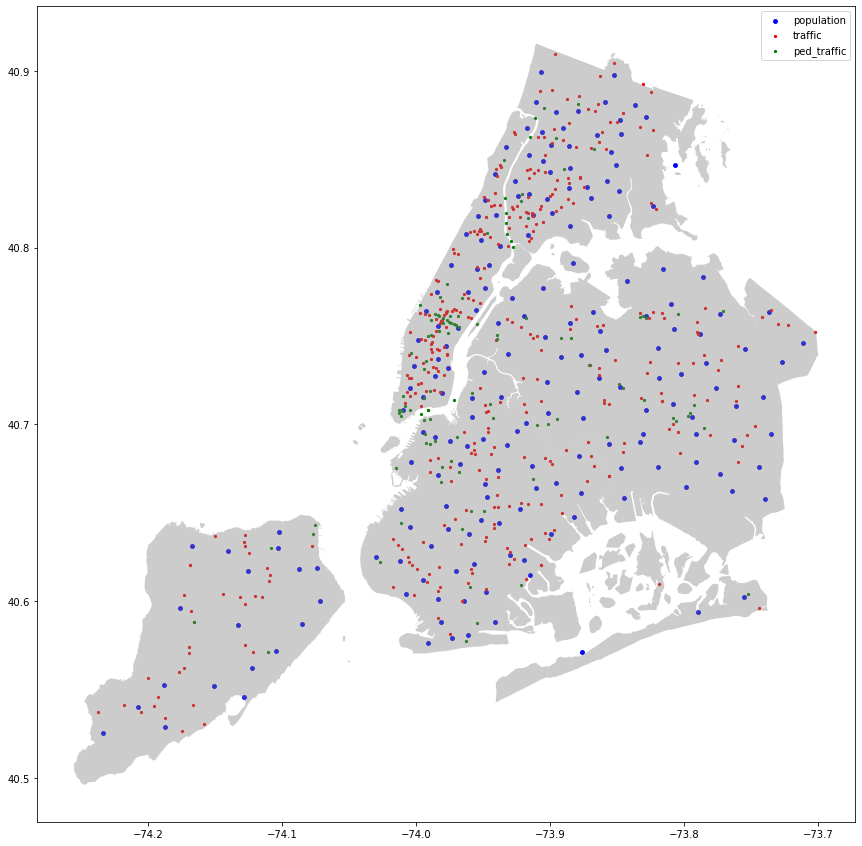

In [6]:
boroughs = geopandas.read_file(geoplot.datasets.get_path('nyc_boroughs'))


fig,ax=plt.subplots(figsize=(15,15))
new_df_list[0].plot(ax = ax, markersize = 15, color = 'blue', marker = 'o', label = 'population')
new_df_list[1].plot(ax = ax, markersize = 5, color = 'red', marker = 'o', label = 'traffic')
new_df_list[2].plot(ax = ax, markersize = 5, color = 'green', marker = 'o', label = 'ped_traffic')

boroughs.plot(ax=ax,alpha=0.4,color="grey")
plt.legend()